### Fourier Simulation Demo

In [111]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys
import math

Populating the interactive namespace from numpy and matplotlib


In [112]:
# Class for representing rotating circles. 
# Params: 
#    speed: angular speed of the rotating circle
#    radius: radius of the circle
#    parent: if not None, the circle's center will be set to the first point of rotation of the parent circle.
#            After that, this circle's center will move along the rotation trace of the parent while drawing 
#            its own rotation trace. 
#    start_angle: the start_angle of the circle rotation. Can be interpreted as phase?
class Circle:
    center = (0,0)
    def __init__(self, radius=2, speed=(math.pi) / 8, parent=None, start_angle=0):
        self.parent = parent
        self.radius = radius
        self.speed = speed
        self.angle = start_angle
        if parent:
            self.center = next(parent.pos)
        self.start_position = (self.center[0] + self.radius * math.cos(self.angle), self.center[1] + self.radius * math.sin(self.angle))
        self.pos = self.gposition()
    def gposition(self):
        self.point = self.start_position
        while True:
            yield self.point
            if self.parent:
                self.center = next(self.parent.pos)
            self.angle += self.speed
            self.point = (self.center[0] + self.radius * math.cos(self.angle), self.center[1] + self.radius * math.sin(self.angle))

# Gives the y-trace of the circle passed to it. 
def full_rotation(circle, dis):
    lst = []
    while len(lst) < dis:
        lst.append(next(circle.pos)[1])
    return lst

# Plots result from full_rotation
def plotter(circle, xran=(0,10)):
    xes = t_samples = numpy.arange(xran[0], xran[1], pi / 16)
    vals = full_rotation(circle, len(xes))
    plt.plot(xes, vals)

### Square Wave Progression

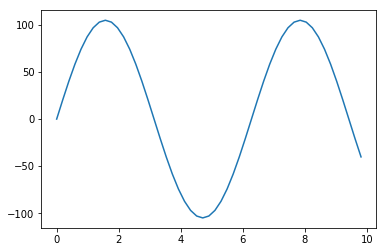

In [113]:
# A circle with radius 105, rotating with pi/6 speed counter clockwise. 
a = Circle(105, (math.pi) / 16)
plotter(a)

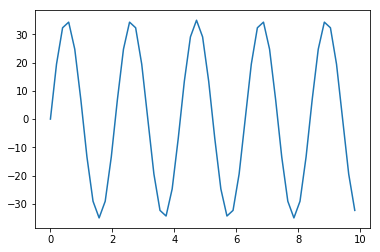

In [114]:
# A smaller circle with radius 35, rotating with 3pi/6 speed counter clockwise. 
b = Circle(35, 3*(math.pi) / 16)
plotter(b)

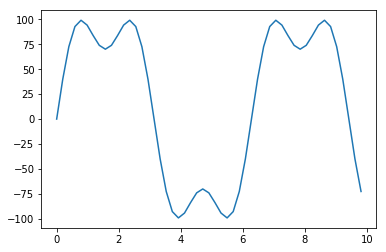

In [115]:
# Trace of the smaller circle(b) rotation, while its center is being rotated around the bigger circle (a).
a = Circle(105, (math.pi) / 16)
b = Circle(35, 3*(math.pi) / 16, a)
plotter(b)

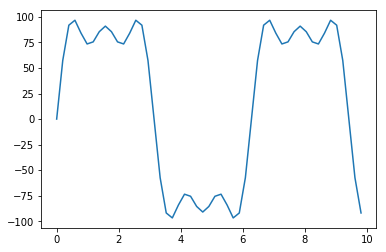

In [116]:
a = Circle(105, (math.pi) / 16)
b = Circle(35, 3*(math.pi) / 16, a)
c = Circle(21, +5*(math.pi) / 16, b)
plotter(c)

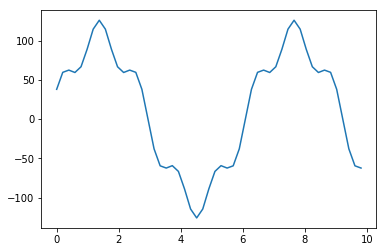

In [117]:
a = Circle(105, (math.pi) / 16)
c = Circle(21, +5*(math.pi) / 16, a)
b = Circle(35, 3*(math.pi) / 16, c)
plotter(c)

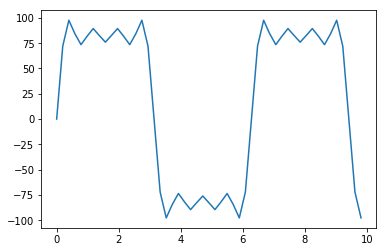

In [118]:
a = Circle(105, (math.pi) / 16)
b = Circle(35, 3*(math.pi) / 16, a)
c = Circle(21, +5*(math.pi) / 16, b)
d = Circle(15, 7*(math.pi) / 16, c)
plotter(d)

### Sawtooth

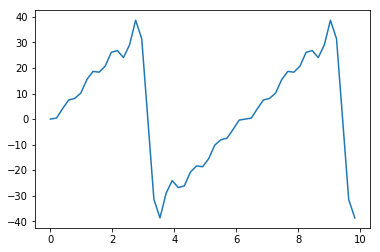

In [101]:
a = Circle(24, (math.pi) / 16)
b = Circle(12, -2*(math.pi) / 16, a)
c = Circle(7, 3*(math.pi) / 16, b)
d = Circle(6, -4*(math.pi) / 16, c)
e = Circle((24/5), 5*(math.pi) / 16, d)
f = Circle(4, -6*(math.pi) / 16, e)
g = Circle(24/7, 7*(math.pi) / 16, f)
h = Circle(3, -8*(math.pi) / 16, g)
plotter(h)

# Approximator demo

In [102]:
import scipy.integrate as integrate
from numpy import sqrt, sin, cos, pi

In [103]:
def finda0(func, domain):
    rng = abs(domain[0] - domain[1])
    integ = integrate.quad(func, domain[0], domain[1])[0] / (rng / 2)
    print(integ)
    return integ

def findas(func, degree, domain):
    lst = []
    rng = abs(domain[0] - domain[1])
    for i in range(1, degree + 1):
        combined = lambda x: func(x) * cos(i * x * pi / (rng / 2))
        integ = integrate.quad(combined, domain[0], domain[1])[0] / (rng / 2)
        lst.append(integ)
    print(lst)
    return lst

def findbs(func, degree, domain): 
    lst = []
    rng = abs(domain[0] - domain[1])
    for i in range(1, degree + 1):
        combined = lambda x: func(x) * sin(i * x * pi / (rng / 2))
        integ = integrate.quad(combined, domain[0], domain[1])[0] / (rng / 2)
        lst.append(integ)
    print(lst)
    return lst

def approximate(func, degree, resolution = pi / 16, domain = (0, 10)):
    a_list = [finda0(func, domain) / 2] + findas(func, degree, domain)
    b_list = findbs(func, degree, domain)
    total = None
    speed = resolution
    hrange = (abs(domain[0] - domain[1])) / 2
    i = 1
    for b in b_list:
        total = Circle(b, pi * (speed * i) / hrange, total)
        i += 1
    
    i = 0
    for a in a_list:
        total = Circle(a, pi * (-speed * i) / hrange, total, pi / 2)
        i += 1
    return total

In [104]:
func = lambda x: sin(x)

In [105]:
integrate.quad(func, 0, pi)

(2.0, 2.220446049250313e-14)

/Users/nima_r/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


0.5132743439273618


/Users/nima_r/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


[0.8199225421284624, -0.7583240444396364, -0.12223977570598088, 0.014364646275697274, -0.2774853654057475, -0.05261646903987024, -0.02015639755714581, -0.039547039151865304, 0.0038136881138171423, 0.016153449803924948, 0.08929416883616001, 0.009857942781540924, 0.031013810974902422, 0.11343916395245734, -0.028366838967497317, 0.012671299071953756, 0.07074246931193183, -0.06993024024170753, -0.012237664534579749, 0.018231027616904403, -0.07517426685109316, -0.0181271613989226, -0.005775935337334083, -0.037392427861033126, -0.005275984146255174, -0.00032412886074869977, 0.015535723626635686, 0.005336534233453762, 0.011581830802953644, 0.047834210029125815, -0.003241875414549724, 0.010951347745721414, 0.04499929820424757, -0.02608767522749869, -0.0010155745576064155, 0.02090691052386199, -0.04171477165400076, -0.010011825020317106, 0.0004840024787305771, -0.03334608021058427, -0.007171737301908625, -0.0030775713523387405, -0.004922867397983638, 0.0013351198485500595, 0.004290894424544231,

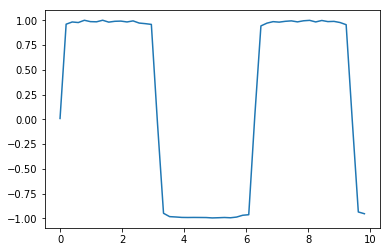

In [106]:
def square_wave(x):
    if x == 0:
        return 1
    elif x < 0:
        if int(x / pi) % 2 == 0:
            return -1
        else: 
            return 1
    else:
        if int(x / pi) % 2 == 0:
            return 1
        else:
            return -1
a = approximate(square_wave, 100)
plotter(a)

10.0
[-5.551115123125783e-16, -1.4710455076283324e-15, -1.554312234475219e-16, -1.2628786905111156e-15, 2.3092638912203257e-15, 2.3703261575747094e-15, 2.7533531010703883e-15, -2.563921297493721e-15, -9.880984919163894e-16, 0.0, 2.020605904817785e-15, 2.3689383787939276e-15, -6.439293542825908e-16, 1.3322676295501878e-15, -7.416289804496045e-15, -2.469378868052985e-15, 7.4495964952348e-15, 4.260480856999038e-15, 6.13398221105399e-15, 3.552713678800501e-16, -4.052314039881821e-15, 1.126876369994534e-15, -2.4702462297909733e-15, 1.791275461293651e-15, -7.283063041541026e-15, -3.2751579226442118e-15, -1.7319479184152442e-15, -1.8207657603852566e-15, 2.665923037881157e-15, 4.025946243046974e-15, 2.8532731732866522e-15, 2.4584717941977807e-14, 3.091971123581061e-15, 1.6681100944992977e-15, -1.9274512541578302e-15, -1.0921819004749978e-15, 4.216765825404423e-15, -6.813993813636898e-16, 3.219646771412954e-16, 4.984901380566953e-15, -6.0840221749458575e-15, -5.54833956556422e-15, 1.28785870856

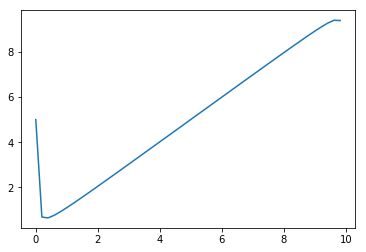

In [107]:
c = approximate(lambda x: x, 50)
plotter(c)

295.17540536588194
[162.03369185986992, 68.85736120003071, 35.15992079008592, 20.86478103232856, 13.702137819731373, 9.652281326012147, 7.153532834727036, 5.508210453727879, 4.369278410772898, 3.549097132832929, 2.9392716686834683, 2.4737390685906915, 2.110417684142283, 1.821490882800473, 1.5879839615521059, 1.3965988568257774, 1.2377943691316085, 1.1045823823878127, 0.9917507153033107, 0.8953483252428966, 0.8123364075785331, 0.7403470391032908, 0.6775131113857887, 0.6223464822995919, 0.5736493412924171, 0.5304488363841925, 0.49194824236527845, 0.4574900565750796, 0.4265278067372094, 0.39860429824849136, 0.3733346738820186, 0.3503931069592515, 0.3295022642027817, 0.3104248987049876, 0.2929570948975873, 0.27692280478999587, 0.262169400968283, 0.24856403578781788, 0.23599064399524491, 0.2243474620560495, 0.21354496486998356, 0.20350414152225893, 0.19415504786832333, 0.1854355863160903, 0.17729047295036515, 0.1696703598368033, 0.16253108642963554, 0.15583303882759908, 0.14954059948670584,

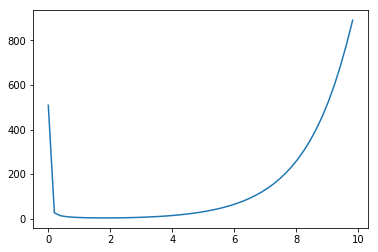

In [108]:
d = approximate(lambda x: pow(2, x), 100)
plotter(d)

0.3678143058152905
[0.6077407286062175, -0.6351079169463121, -0.14406815892594127, -0.06918293367795239, -0.04146907676853271, -0.027838926238624207, -0.020050468374530943, -0.01515748237543257, -0.011873588540364521, -0.009558976920444945, -0.007864508710137951, -0.00658588020900953, -0.005596813099655158, -0.0048157291070182046, -0.004187967853978532, -0.003675763035876563, -0.0032523279012402957, -0.0028982278318033794, -0.0025990805222081787, -0.0023440552046030128, -0.00212486819651585, -0.0019350954019819733, -0.0017696922561373286, -0.0016246524537938476, -0.001496761378411407, -0.0013834153144569017, -0.0012824871034677165, -0.0011922250791442212, -0.001111176174525244, -0.001038126807296491, -0.0009720569924764853, -0.0009121044024281662, -0.0008575359822430229, -0.000807725357159924, -0.0007621347187262633, -0.0007203002024483357, -0.0006818200079625179, -0.0006463446889662213, -0.0006135691712763118, -0.0005832261560976021, -0.0005550806402935378, -0.0005289253425111058, -0.

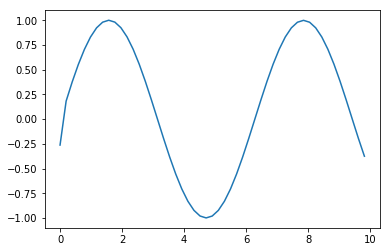

In [109]:
e = lambda x: -pow(x, 3) + 4*pow(x,2)
plotter(approximate(func, 100, pi / 16))

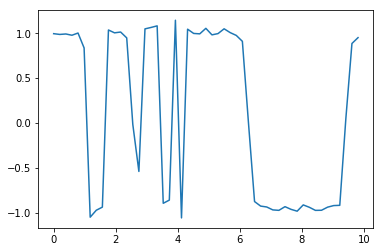

In [56]:
# Just seeing how crazy of a function the fourier Series can approximate. 
func3 = lambda x: square_wave(max(e(x), (lambda x: -x)(x)))
plotter(approximate(func3, 50))